# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')));

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Question 1

In [8]:
# load data as a dataframe
data = pd.read_json('data/world_bank_projects.json')

In [9]:
# print column names
data.columns

Index([u'_id', u'approvalfy', u'board_approval_month', u'boardapprovaldate',
       u'borrower', u'closingdate', u'country_namecode', u'countrycode',
       u'countryname', u'countryshortname', u'docty',
       u'envassesmentcategorycode', u'grantamt', u'ibrdcommamt', u'id',
       u'idacommamt', u'impagency', u'lendinginstr', u'lendinginstrtype',
       u'lendprojectcost', u'majorsector_percent', u'mjsector_namecode',
       u'mjtheme', u'mjtheme_namecode', u'mjthemecode', u'prodline',
       u'prodlinetext', u'productlinetype', u'project_abstract',
       u'project_name', u'projectdocs', u'projectfinancialtype',
       u'projectstatusdisplay', u'regionname', u'sector', u'sector1',
       u'sector2', u'sector3', u'sector4', u'sector_namecode', u'sectorcode',
       u'source', u'status', u'supplementprojectflg', u'theme1',
       u'theme_namecode', u'themecode', u'totalamt', u'totalcommamt', u'url'],
      dtype='object')

The columns of interest for question 1 are 'countryname' and 'project_name'. First, we extract the relevant data.

In [10]:
# filter relevant data
d1 = pd.pivot_table(data, index='countryname', values = 'project_name', aggfunc='count')

In [11]:
# display data
d1.head(10)

countryname
Africa                                      11
Antigua and Barbuda                          1
Arab Republic of Egypt                       2
Argentine Republic                           2
Bosnia and Herzegovina                       1
Burkina Faso                                 9
Central African Republic                     1
Democratic Republic of Sao Tome and Prin     2
Democratic Republic of Timor-Leste           2
Democratic Republic of the Congo             6
Name: project_name, dtype: int64

Now that the relevant data is nicely formatted, we can use it to identify the ten countries with the most projects.

In [12]:
# rank value for country
rank = 1
# extract top ten countries
d1_top = d1.sort_values(ascending=False)[:10]

# display top ten countries by project number
for c, v in d1_top.iteritems():
    print 'Rank {}: {} has {} projects.'.format(rank, c, v)
    rank += 1

Rank 1: People's Republic of China has 19 projects.
Rank 2: Republic of Indonesia has 19 projects.
Rank 3: Socialist Republic of Vietnam has 17 projects.
Rank 4: Republic of India has 16 projects.
Rank 5: Republic of Yemen has 13 projects.
Rank 6: Nepal has 12 projects.
Rank 7: People's Republic of Bangladesh has 12 projects.
Rank 8: Kingdom of Morocco has 12 projects.
Rank 9: Africa has 11 projects.
Rank 10: Republic of Mozambique has 11 projects.


As we can see, both China and Indonesia have the most projects listed with 19 entries each. Next, we will plot this outcome.

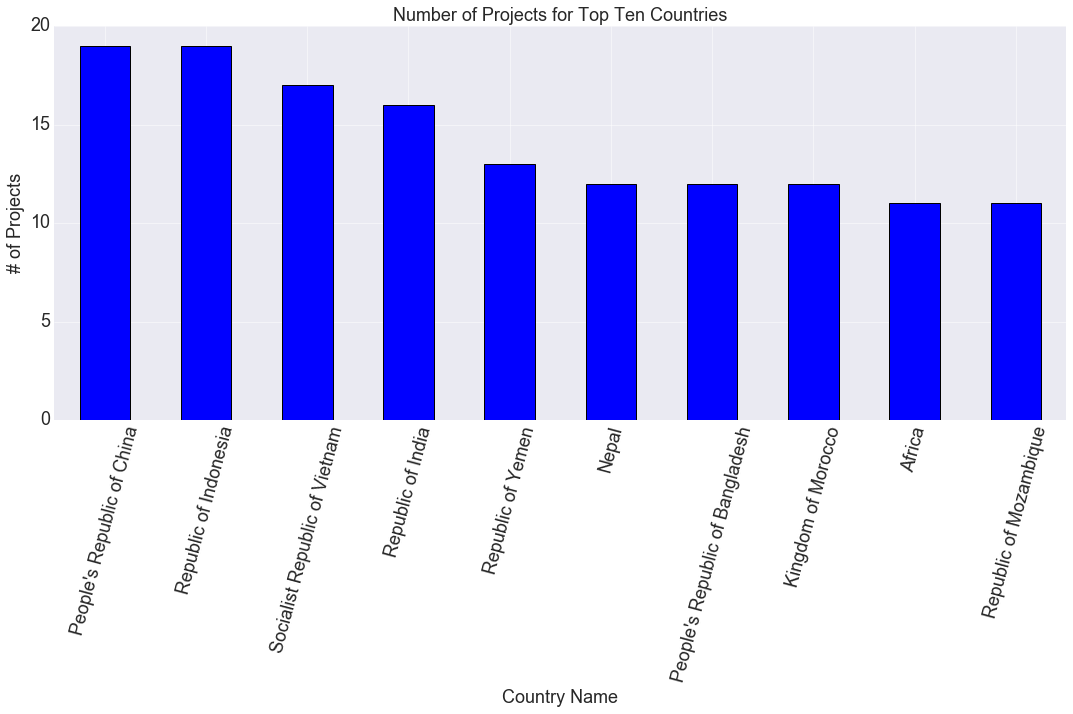

In [13]:
plt.style.use('seaborn-darkgrid')
ax = d1_top.plot(kind='bar', title='Number of Projects for Top Ten Countries', rot=75, figsize=(15,10), fontsize=18)
ax.set_xlabel('Country Name', fontsize=18)
ax.set_ylabel('# of Projects', fontsize=18)
ax.title.set_size(18)
plt.tight_layout()

### Question 2

In [14]:
# read data as nested json
data = json.load((open('data/world_bank_projects.json')))
# normalize data of interest
d2 = json_normalize(data, 'mjtheme_namecode')
# display data
d2.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


From the output we can see that the project theme code has a unique identifier. Some of these entries have a missing entry in the name column, however. Before we deal with the missing name entries, we'll first display the top ten project themes by their codes.

In [15]:
# group entries by project code, count the occurances of the code, rename column, sort and extract top ten codes
d2.groupby('code').count().rename(columns={'name':'count'}).sort_values('count', ascending=False)[:10]

,count
code,
11,250
10,216
8,210
2,199
6,168
4,146
7,130
5,77
9,50


We can see the top ten prokect themes by project code. Next, we need to add in the project names by first filling in the missing entries using code/name pairs.

### Question 3

Before the missing entries are filled, we need to first identify how they are represented in the dataframe.

In [16]:
# display values in name column
d2.name.unique()

array([u'Human development', u'', u'Economic management',
       u'Social protection and risk management', u'Trade and integration',
       u'Public sector governance',
       u'Environment and natural resources management',
       u'Social dev/gender/inclusion',
       u'Financial and private sector development', u'Rural development',
       u'Urban development', u'Rule of law'], dtype=object)

From this output, we can see that the missing values are represented as empty strings. These will first be filled with the correct name. This will be done by populating a dictionary with key, value pairs where the key is the project code and the value is the correct project name.

In [17]:
# dictionary to store code names
project_names = {}
# fill dictionary
for i, row in d2.iterrows():
    if row['code'] not in project_names and row['name'] != '':
        project_names[row['code']] = row['name']
# display dictionary
project_names

{u'1': u'Economic management',
 u'10': u'Rural development',
 u'11': u'Environment and natural resources management',
 u'2': u'Public sector governance',
 u'3': u'Rule of law',
 u'4': u'Financial and private sector development',
 u'5': u'Trade and integration',
 u'6': u'Social protection and risk management',
 u'7': u'Social dev/gender/inclusion',
 u'8': u'Human development',
 u'9': u'Urban development'}

Now we need to map the correct code/name pairs across the dataframe.

In [18]:
# map new values in name column
d2['name'] = d2['code'].map(project_names)
# display head
d2.head(10)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


Here we can see that the missing values have been updated with their correct name. Next, we display the top 10 project themes. This will be done by pivoting the dataframe, aggregating the code counts, sorting and displaying the ten highest counts.

In [19]:
# pivot dataframe
d2_top = pd.pivot_table(d2, values='code', aggfunc='count', index='name').sort_values(ascending=False)[:10]
# dispaly top ten project themes
rank = 1
for name, count in d2_top.iteritems():
    print 'Rank {}: {} project theme has {} entries.'.format(rank, name, count)
    rank += 1

Rank 1: Environment and natural resources management project theme has 250 entries.
Rank 2: Rural development project theme has 216 entries.
Rank 3: Human development project theme has 210 entries.
Rank 4: Public sector governance project theme has 199 entries.
Rank 5: Social protection and risk management project theme has 168 entries.
Rank 6: Financial and private sector development project theme has 146 entries.
Rank 7: Social dev/gender/inclusion project theme has 130 entries.
Rank 8: Trade and integration project theme has 77 entries.
Rank 9: Urban development project theme has 50 entries.
Rank 10: Economic management project theme has 38 entries.


Finally, we can now see the top ten project themes with their proper names. Lastly, we'll visualize this outcome.

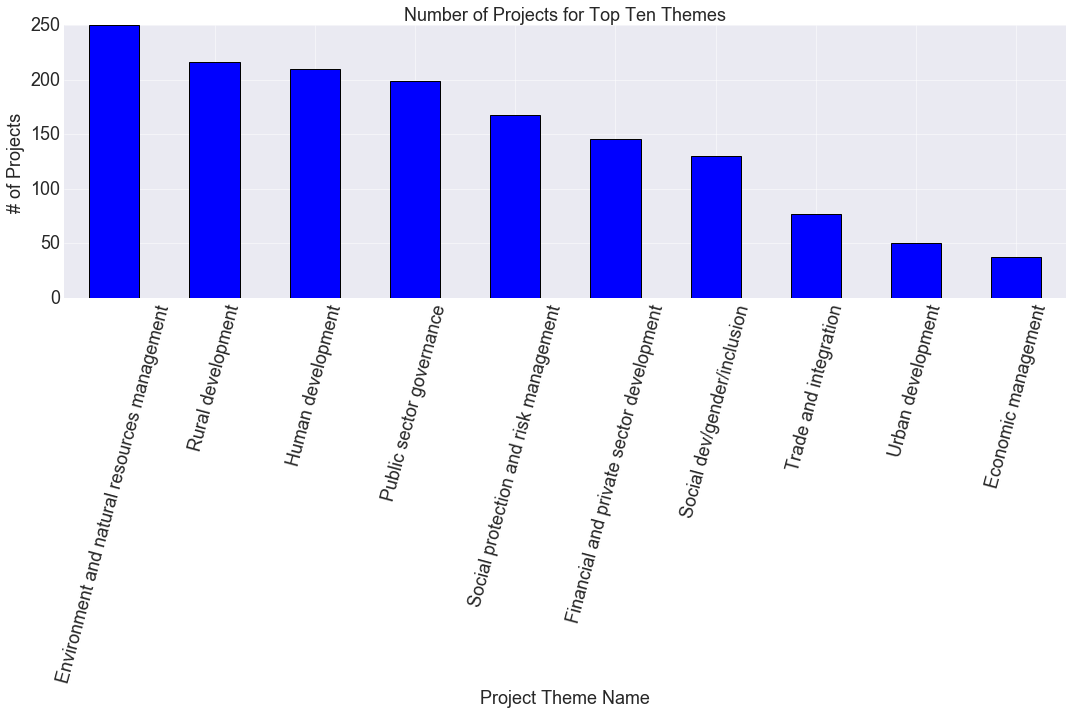

In [20]:
ax = d2_top.plot(kind='bar', title='Number of Projects for Top Ten Themes', rot=75, figsize=(15,10), fontsize=18)
ax.set_xlabel('Project Theme Name', fontsize=18)
ax.set_ylabel('# of Projects', fontsize=18)
ax.title.set_size(18)
plt.tight_layout()